In [23]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import urllib2 #from urllib.request import urlopen   # in Python3
import numpy as np
%matplotlib inline

url = "http://wiki.nurserylive.com/uploads/default/original/2X/b/bd24518a6fb6b8dbe9e55bb793a94df7adbe9bc1.png"

<type 'numpy.ndarray'>
(315, 600, 3)


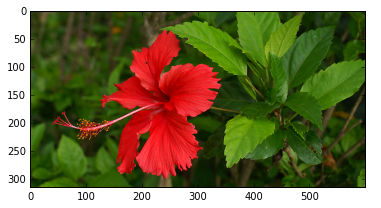

In [24]:
try:
    data = urllib2.urlopen(url) #PNG   #data = urlopen(url) #in Python3
except Exception:
    from io import BytesIO
    data = BytesIO(urllib2.urlopen(url).read()) #JPG   # data = BytesIO(urlopen(url).read())  # in Python3
    
# First, load the image
image = mpimg.imread(data)
print(type(image))

# Print out its shape
print(image.shape)
plt.imshow(image)
plt.show()

In [25]:
import tensorflow as tf
print tf.__version__


0.10.0rc0


(315, 600, 3)
<type 'numpy.ndarray'>
(600, 315, 3)


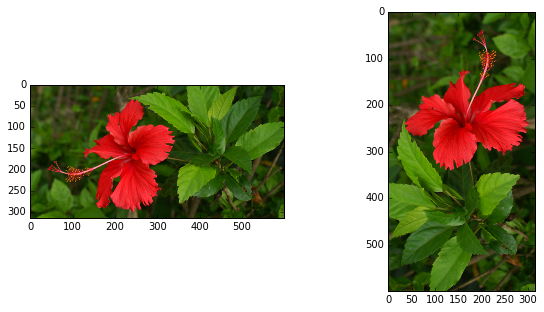

In [26]:
# Create a TensorFlow Variable
x = tf.Variable(image, name='x')
x = tf.transpose(x, perm=[1, 0, 2])

with tf.Session() as session:
    model = tf.initialize_all_variables()
    session.run(model)
    result = session.run(x)

print(image.shape)    
print(type(result))
print(result.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(result)

plt.show()

(315, 600, 3)
(315, 600, 3)


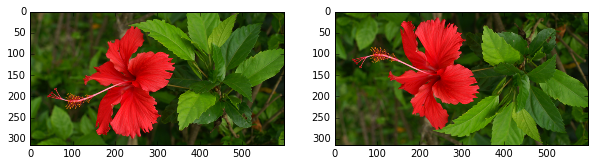

In [28]:
height, width, depth = image.shape

# Create a TensorFlow Variable
x = tf.Variable(image, name='x')
x = tf.reverse_sequence(x, [height] * width, seq_dim=0, batch_dim=1)
# x = tf.reverse_sequence(x, np.ones((height,)) * width, seq_dim=1, batch_dim=0)

with tf.Session() as session:
    model = tf.initialize_all_variables()
    session.run(model)
    result = session.run(x)

print image.shape
print result.shape

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(result)

plt.show()

In [9]:
print [width] * height
print np.ones(height)
print np.ones((height,))
print np.ones((height,)) * width

[600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600,

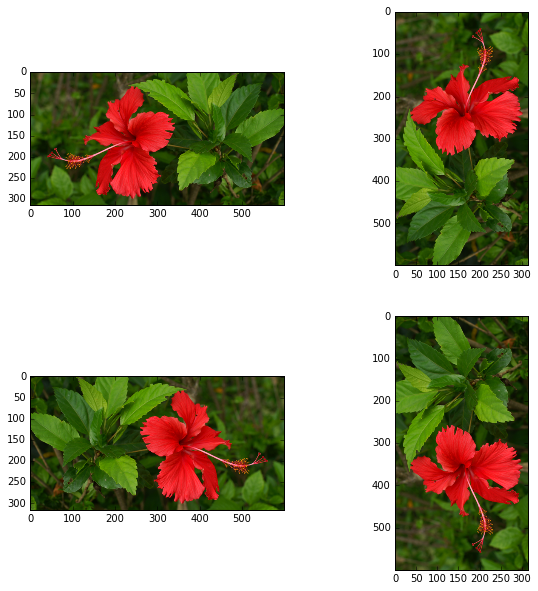

In [11]:
# Create a TensorFlow Variable
x = tf.Variable(image, name='x')
x1 = tf.transpose(x, perm=[1, 0, 2])
x2 = tf.reverse_sequence(x, [width] * height, seq_dim=1, batch_dim=0)
x3 = tf.transpose(x2, perm=[1, 0, 2])

with tf.Session() as session:
    model = tf.initialize_all_variables()
    session.run(model)
    result90 = session.run(x1)
    result180 = session.run(x2)
    result270 = session.run(x3)    

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.imshow(image)

plt.subplot(2,2,2)
plt.imshow(result90)

plt.subplot(2,2,3)
plt.imshow(result180)

plt.subplot(2,2,4)
plt.imshow(result270)

plt.show()    

(315, 600, 3)
(315, 600, 3)


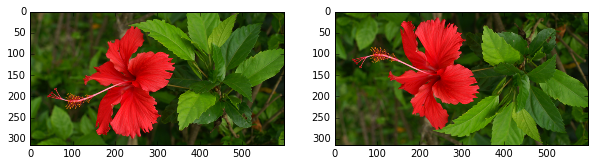

In [13]:
height, width, depth = image.shape

# Create a TensorFlow Variable
x = tf.Variable(image, name='x')
x = tf.reverse_sequence(x, [height] * width, seq_dim=0, batch_dim=1)

with tf.Session() as session:
    model = tf.initialize_all_variables()
    session.run(model)
    result = session.run(x)

print image.shape
print result.shape

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(result)

plt.show()

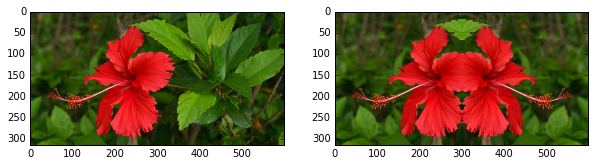

In [15]:
height, width, depth = image.shape

# Create a TensorFlow Variable
x = tf.Variable(image, name='x')
x1_half = tf.slice(x, [0, 0, 0], [height, width / 2, 3]) 

x = tf.Variable(image, name='x')
x2 = tf.reverse_sequence(x, [width / 2] * height, seq_dim=1, batch_dim=0)
x2_half = tf.slice(x2, [0, 0, 0], [height, width / 2, 3])

x3 = tf.concat(concat_dim=1, values=[x1_half, x2_half])

with tf.Session() as session:
    model = tf.initialize_all_variables()
    session.run(model)
    result = session.run(x3)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(result)

plt.show()

In [29]:
import tensorflow as tf
import numpy as np

# Numpy 랜덤으로 100개의 가짜 데이터 채우기.
x = np.float32(np.random.rand(2, 100))

# 학습 레이블(목표값)은 아래의 식으로 산출. (W = [0.1, 0.2], b = 0.3)
y_target = np.dot([0.100, 0.200], x) + 0.300

print(type(x), x.shape)
#print(x)
print(type(y_target), y_target.shape)
#print(y_target)

(<type 'numpy.ndarray'>, (2, 100))
(<type 'numpy.ndarray'>, (100,))


In [30]:
# b는 0 으로 초기화
b = tf.Variable(tf.zeros([1]))

# W는 1x2 형태의 가중치 변수, 역시 0으로 초기화
W = tf.Variable(tf.zeros([1, 2]))

# 모델 생성 --> Tenforflow Graph 완성
y = tf.matmul(W, x) + b

print(b.get_shape())
print(W.get_shape())
print(y.get_shape())

(1,)
(1, 2)
(1, 100)


In [31]:
# 손실 함수 정의
loss = tf.reduce_mean(tf.square(y - y_target))

# 경사하강법으로 Backpropagation 적용 (0.0005는 learning rate) --> W와 b 변수 변경
optimizer = tf.train.GradientDescentOptimizer(0.0005)

# optimizer의 학습 목표 정의
train = optimizer.minimize(loss)

In [33]:
# 세션 시작
with tf.Session() as sess:
    # 모든 변수를 초기화.
    init = tf.initialize_all_variables()
    sess.run(init)

    # 100000번 학습.
    for step in xrange(0, 100001):
        sess.run(train)
        if step % 10000 == 0:
            loss_value = sess.run(loss)
            w_value = sess.run(W)
            b_value = sess.run(b)
            print("step: {0}, loss: {1}, w: {2}, b: {3}".format(step, loss_value, w_value, b_value))
    
    print
    
    # 학습된 모델을 활용한 값과 실제 값 비교
    sample_x = [[x[0][0]], [x[1][0]]] # 0번째 데이터
    sample_y = sess.run(tf.matmul(W, sample_x) + b)
    sample_y_target = y_target[0]
    print("sample_x: {0}, sample_y: {1}, sample_y_target: {2}".format(sample_x, sample_y, sample_y_target))
    
    sample_x = [[x[0][1]], [x[1][1]]] # 1번째 데이터
    sample_y = sess.run(tf.matmul(W, sample_x) + b)
    sample_y_target = y_target[1]
    print("sample_x: {0}, sample_y: {1}, sample_y_target: {2}".format(sample_x, sample_y, sample_y_target))
    
    sample_x = [[x[0][2]], [x[1][2]]] # 2번째 데이터
    sample_y = sess.run(tf.matmul(W, sample_x) + b)
    sample_y_target = y_target[2]
    print("sample_x: {0}, sample_y: {1}, sample_y_target: {2}".format(sample_x, sample_y, sample_y_target))
    
    print
    
    # 학습된 모델을 활용한 새로운 데이터 값에 대한 y 값 예측
    new_x = [[1.5], [1.5]]
    y_value = sess.run(tf.matmul(W, new_x) + b)
    print("new_x: {0}, y_value: {1}".format(new_x, y_value))

step: 0, loss: 0.20040614903, w: [[ 0.00024204  0.00021751]], b: [ 0.00044436]
step: 10000, loss: 0.00012561204494, w: [[ 0.12887871  0.17099436]], b: [ 0.29786786]
step: 20000, loss: 2.8080350603e-05, w: [[ 0.11308832  0.18559992]], b: [ 0.29963323]
step: 30000, loss: 6.34951447864e-06, w: [[ 0.10587371  0.19277069]], b: [ 0.3001999]
step: 40000, loss: 1.46067384321e-06, w: [[ 0.10260247  0.19632675]], b: [ 0.30030918]
step: 50000, loss: 3.46111619365e-07, w: [[ 0.1011117   0.19808751]], b: [ 0.30030912]
step: 60000, loss: 8.71944152436e-08, w: [[ 0.10043279  0.19896381]], b: [ 0.30026335]
step: 70000, loss: 2.47861127178e-08, w: [[ 0.10013556  0.19941202]], b: [ 0.30021366]
step: 80000, loss: 9.07378350234e-09, w: [[ 0.10001594  0.19963661]], b: [ 0.30017337]
step: 90000, loss: 3.49709639025e-09, w: [[ 0.09995375  0.19978562]], b: [ 0.30013761]
step: 100000, loss: 3.45116357714e-09, w: [[ 0.09995373  0.19978721]], b: [ 0.30013689]

sample_x: [[0.088728927], [0.14155027]], sample_y: [